<a href="https://colab.research.google.com/github/MuhammedEmirEren/PyTorch_Workflow/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Resources:
* https://www.learnpytorch.io/01_pytorch_workflow/

* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb


In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build modeş",
                      3: "fitting the model to data (trainingn)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build modeş',
 3: 'fitting the model to data (trainingn)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
# https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.1+cu121'

## 1.Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kinf
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a geame of two parts:
1. Get data into a numerical representation
2. Build a model to  learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Ideal output is ccreateed by us for now
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set wwith our data, validation set is not always used but training and test is always used.

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # Normally, we should use randomness

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?


In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})



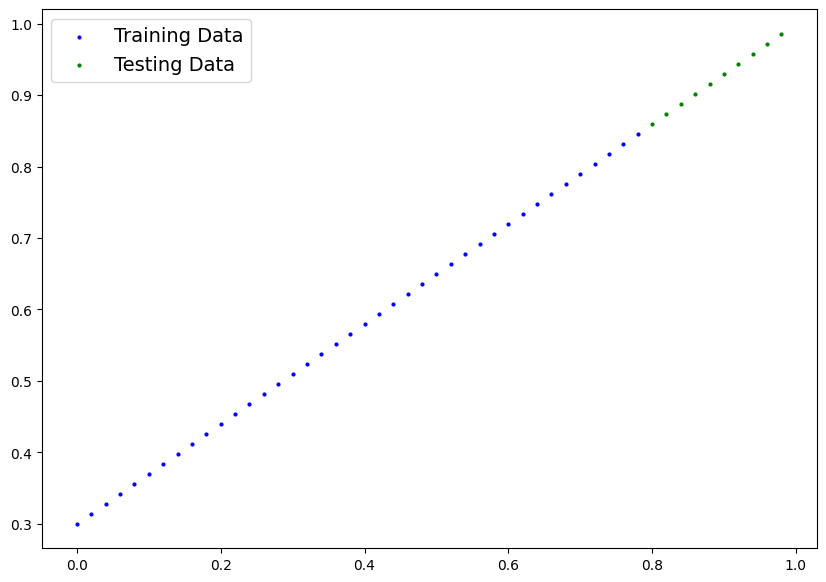

In [6]:
plot_predictions()

## 2. Build Model

First PyTorch model

Python classes from real phyton: https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with random values (wweight and bias)
* Look at training data annd adjust the random values to better represent (or get closer to) ideal values (the weight and bias values we used to create the data)

How does it do so?
Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [7]:
from torch import nn
import torch
# Create linear regression model class
class LinearRegressionModel(nn.Module): # nn.Module in the parannthesis means inheritance ---
                                       # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # Default is true
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <-- "x" is the input data with the required type torch.Tensor, return type is torch.Tensor
      return self.weights * x + self.bias # This is the linear regression formula




### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (aa neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modulesi if you subclass it, you should override forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses reqire you to override forward() method, this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we created our model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.



In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias

(0.7, 0.3)

### Making predictions
`using torch.inference_mode()`

To check our model's predicctive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward ` method.

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# Make predictions with model
with torch.inference_mode(): # Turns off the gradient track, disables pytorch's some features, faster
  y_preds = model_0(X_test) # Normally, this will work without inference mode

# You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

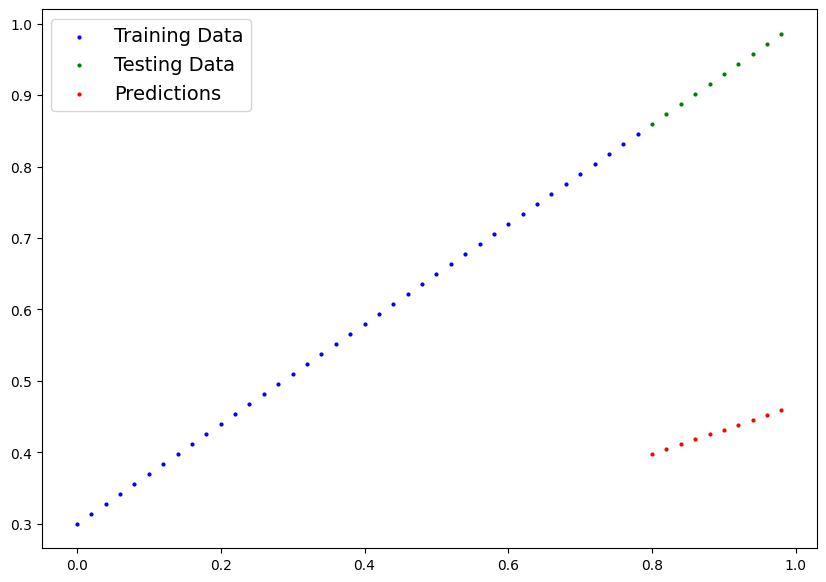

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to mmove from unknown parameters (these may be random) to some known parameters

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

* Note: loss function mmay also bbe called cost or criterion in different arries.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameter (e.g. weight & bias) to improve the loss function.
  Inside the optimizer you'll often have to set two parameters:
    * params - the model parameters you'd like to optimize, for example params=model_0.parameters()
    * lr(learning rate) - the learning rate is a  hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small channges, a large lr results in large changes)

And specificially for PyTorch, we need:
 * A training loop
 * A testing loop

In [23]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer, SGD (stochastic gradient descent) is chosen here :: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter we can set

In [26]:
loss_fn

L1Loss()

### Building a training (and a testing) loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the datawith
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradieent of each off the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameteers to try and improve the loss (**gradient descent**)


In [28]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter because we set it ourselves)
epochs = 1

#0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  model_0.eval() # turns off gradient tracking